## SVM- Support Vector Machines
### This notebook is used for the parameter optimization when using SVM for predicting categorical data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-activity-recognition-with-smartphones/train.csv
/kaggle/input/human-activity-recognition-with-smartphones/test.csv


### Dataset: Human-activity-recognition-with-smartphone
#### Multi-class dataset with 6 labels

#### Training dataset

In [2]:
train=pd.read_csv('/kaggle/input/human-activity-recognition-with-smartphones/train.csv')

In [3]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
len(train)

7352

#### Testing dataset

In [5]:
test=pd.read_csv('/kaggle/input/human-activity-recognition-with-smartphones/test.csv')

In [6]:
len(test)

2947

### Classification dataset used for SVM parameter optimization

In [7]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random

### Parameters used:
* Kernel
* Nu
* C

#### For kernel_list: Sigmoid not used as the accuracy is coming out to be negative i.e. not working with this dataset and parameters

In [8]:
kernel_list=['linear', 'poly', 'rbf']

In [9]:
train_data=train

### Pre-processing for SVM
#### Encoding string labels into numerical classes

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_data['Activity'] = label_encoder.fit_transform(train_data['Activity'])

In [11]:
train_data['Activity']

0       2
1       2
2       2
3       2
4       2
       ..
7347    5
7348    5
7349    5
7350    5
7351    5
Name: Activity, Length: 7352, dtype: int64

### Fitness function

In [12]:
def fitnessFunction(sample,k,n,c):
    x=sample.drop('Activity',axis=1)
    y=sample['Activity']
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    model=svm.NuSVR(kernel=k,nu=n,C=c)
    model.fit(X_train,y_train)
    accuracy=model.score(X_test,y_test)
    
    return accuracy

### Execution function
#### Running loop till no of specified iterations

#### Here, the range of SVM parameters are specified:
* k from the choices in list
* Nu (0,1]
* C can range from 0.01,0.1,1,10,100.... but here I have taken (0,1] to reduce processing time

In [13]:
def execute(sample):    
    best_a=0
    best_k=None
    best_c=0
    best_n=0
    acc_list=[]
    for i in range(iterations):
        k=random.choice(kernel_list)
        n=round(random.random(),2)
        while n == 0:
            n = round(random.random(),2)
        c=random.uniform(0.01, 1)
        #e=round(random.uniform(0, 1),2)
        a=fitnessFunction(sample,k,n,c)
        acc_list.append(a)
        if a>best_a:
            best_k=k
            best_n=n
            best_c=c
            best_a=a
    return [best_a,best_k,best_n,best_c],acc_list

### Sampling: 10 samples are created(size=2000) and each sample is used for running 100 iterations of random parameter for optimization

In [14]:
num_samples=2000

### Final dataframe

In [15]:
ans=[]

In [16]:
iterations=100
max_sample=train_data
max_s=0
max_parameters=[]
max_acc_list=[]
index=0
for i in range(10):
    print('Sample: ',i+1,' started')
    sample=train_data.sample(n=num_samples, random_state=42)
    parameters,acc_list=execute(sample)
    ans.append(parameters)
    
    if(parameters[0]>max_s):
        index=i+1
        max_s=parameters[0]
        max_sample=sample
        max_parameters=parameters
        max_acc_list=acc_list

Sample:  1  started
Sample:  2  started
Sample:  3  started
Sample:  4  started
Sample:  5  started
Sample:  6  started
Sample:  7  started
Sample:  8  started
Sample:  9  started
Sample:  10  started


In [17]:
print('The best sample is Sample',index)
print('The best parameters: ',max_parameters)

The best sample is Sample 8
The best parameters:  [0.9596418701284893, 'linear', 0.52, 0.8372134188284429]


### Final Dataframe of the 10 samples

In [18]:
df = pd.DataFrame(ans)
df.columns=['Accuracy','Kernel','Nu','C']
df.index=['Sample1','Sample2','Sample3','Sample4','Sample5','Sample6','Sample7','Sample8','Sample9','Sample10']
df

,Accuracy,Kernel,Nu,C
Sample1,0.958875,linear,0.49,0.224711
Sample2,0.959349,linear,0.54,0.382223
Sample3,0.959316,linear,0.51,0.676600
Sample4,0.959439,linear,0.33,0.778909
Sample5,0.959377,linear,0.51,0.268380
Sample6,0.959204,linear,0.55,0.235650
Sample7,0.959234,linear,0.49,0.981342
Sample8,0.959642,linear,0.52,0.837213
Sample9,0.959391,linear,0.52,0.507204
Sample10,0.958955,linear,0.48,0.939198


### Graph: Change in accuracy with iterations with each iteration having different random parameters for SVM
#### Note: Out of the 10 samples only the best sample(Max accuracy) has been used for plotting

Text(0, 0.5, 'Accuracy')

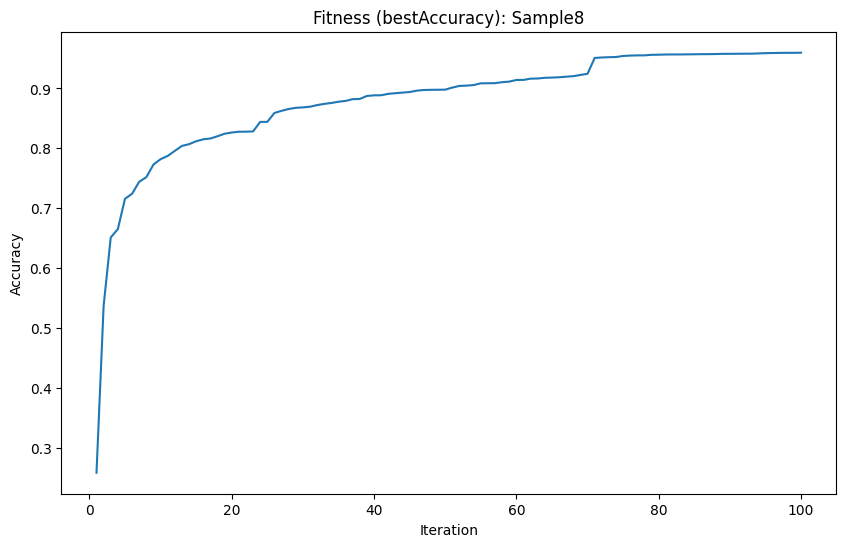

In [19]:
import matplotlib.pyplot as plt
import numpy as np

iterations = np.arange(1, 101)
max_acc_list.sort()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(iterations, max_acc_list)

# Add title and labels
title='Fitness (bestAccuracy): Sample'+str(index)
plt.title(title)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')